In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [26]:
df_train = pd.read_excel('./kawkaw_trainData.xlsx')
df_test = pd.read_excel('./kawkaw_testData.xlsx')


In [27]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.split()[0]  # Gardez uniquement le canal "Red"
    img = img.resize((400, 400))
    img = np.array(img)
    img = img / 255.0  # Normalisez les valeurs dans la plage [0, 1]
    return img


# Set up the ImageDataGenerator.
datagen = ImageDataGenerator(
    preprocessing_function=load_and_preprocess_image  # Apply the preprocessing function
)


In [28]:
import os
import numpy as np
from PIL import Image

# Créez des listes pour stocker vos données et étiquettes
X_train = []
Y_train = []
X_test = []
Y_test = []

# Chemin vers vos données d'entraînement et de test
train_data_dir = './train_resizedimages400/'
test_data_dir = './test_resizedimages400/'

# Chargez les données d'entraînement
for filename in os.listdir(train_data_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(train_data_dir, filename)
        img = load_and_preprocess_image(img_path)
        X_train.append(img)
        # Ajoutez les étiquettes correspondantes à Y_train
        
# Chargez les données de test de la même manière

# Convertissez les listes en tableaux Numpy
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)


In [29]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory='./train_resizedimages400/',
    x_col='Name',
    y_col=['Cu %', 'Fe %', 'Pb %', 'Zn %'],
    target_size=(400, 400),
    batch_size=32,
    class_mode='raw',
    color_mode='grayscale'  # Use grayscale format (one channel)
)

# Set up the data generator for test data.
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    directory='./test_resizedimages400/',
    x_col='Name',
    y_col=['Cu %', 'Fe %', 'Pb %', 'Zn %'],
    target_size=(400, 400),
    batch_size=32,
    class_mode='raw',
    color_mode='grayscale'  # Use grayscale format (one channel)
)

Found 4320 validated image filenames.
Found 2142 validated image filenames.


In [30]:
def create_cnnr(input_shape):
    model = keras.models.Sequential()

    # Couche de convolution avec activation ReLU
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Couche totalement connectée
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Couche de sortie avec 4 neurones (pour la régression)
    model.add(layers.Dense(4, activation='linear'))

    return model

In [31]:
input_shape = (400, 400, 1)


In [32]:
model_cnnr = create_cnnr(input_shape)

In [33]:
model_cnnr.compile(
    loss='mean_squared_error',  # Utilisez une fonction de perte appropriée pour votre tâche
    optimizer='adam'  # Utilisez un optimiseur adapté à votre tâche
)

In [34]:
model_cnnr.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 398, 398, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 199, 199, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 128)     

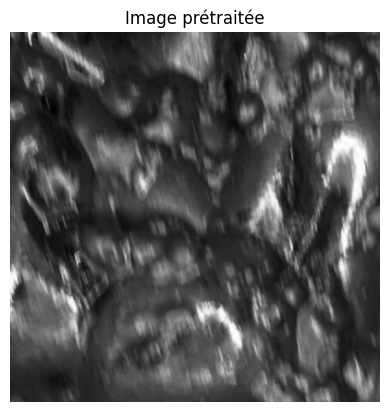

In [26]:
# Chargez une image en utilisant la fonction load_and_preprocess_image
image_path = 'train_resizedimages_channels\eb1_zn12_6_23-2=0_blue.jpg'  # Remplacez par le chemin de votre image
preprocessed_image = load_and_preprocess_image(image_path)

# Affichez l'image prétraitée
import matplotlib.pyplot as plt
plt.imshow(preprocessed_image, cmap='gray')  # Utilisez 'gray' pour afficher en niveaux de gris
plt.title('Image prétraitée')
plt.axis('off')  # Masquez les axes
plt.show()


In [35]:
# Entraînement du modèle CNNR
epochs = 10  # Nombre d'époques d'entraînement
batch_size = 32  # Taille du lot

# Entraînement du modèle avec les données d'entraînement
history = model_cnnr.fit(
    X_train,  # Générateur de données d'entraînement
    epochs=epochs,     # Nombre d'époques
    batch_size=batch_size,  # Taille du lot
    validation_data=Y_train   # Données de validation
)

# Une fois l'entraînement terminé, vous pouvez évaluer le modèle si nécessaire
# en utilisant les données de test ou l'utiliser pour des prédictions.


Epoch 1/10


ValueError: in user code:

    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in train_step
        self._validate_target_and_loss(y, loss)
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1006, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=mean_squared_error, and therefore expects target data to be provided in `fit()`.


In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
df_train = pd.read_excel('./kawkaw_trainData.xlsx')
df_test = pd.read_excel('./kawkaw_testData.xlsx')

In [3]:
train_data_dir = './train_resizedimages400/'
test_data_dir = './test_resizedimages400/'


In [4]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.split()[0]  # Gardez uniquement le canal "Red"
    img = img.resize((400, 400))
    img = np.array(img)
    img = img / 255.0  # Normalisez les valeurs dans la plage [0, 1]
    return img


In [5]:
X_train = []
Y_train = []
X_test = []
Y_test = []

In [6]:
for filename in df_train['Name']:
    img_path = os.path.join(train_data_dir, filename)
    img = load_and_preprocess_image(img_path)
    X_train.append(img)
    # Ajoutez les étiquettes correspondantes à Y_train
    labels = df_train.loc[df_train['Name'] == filename, ['Cu %', 'Fe %', 'Pb %', 'Zn %']].values
    Y_train.append(labels)


In [7]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)


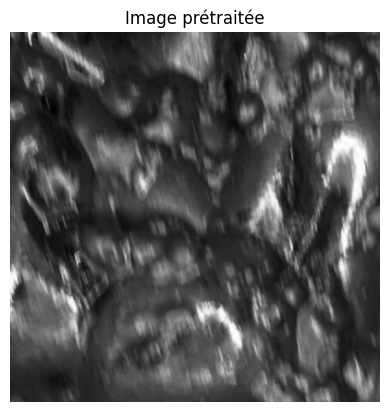

In [8]:
# Chargez une image en utilisant la fonction load_and_preprocess_image
image_path = 'train_resizedimages_channels\eb1_zn12_6_23-2=0_blue.jpg'  # Remplacez par le chemin de votre image
preprocessed_image = load_and_preprocess_image(image_path)

# Affichez l'image prétraitée
import matplotlib.pyplot as plt
plt.imshow(preprocessed_image, cmap='gray')  # Utilisez 'gray' pour afficher en niveaux de gris
plt.title('Image prétraitée')
plt.axis('off')  # Masquez les axes
plt.show()

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

def create_cnn(width=400, height=400, depth=1):
    model = keras.models.Sequential()
    input_shape = (width, height, depth)
    
    model.add(layers.Conv2D(16, 3, strides=(1,1), padding="valid", activation='relu', input_shape=input_shape))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(16, 3, activation='relu'))
    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.Conv2D(8, 5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(8, 5, activation='relu'))
    model.add(layers.Conv2D(8, 3, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(8, 3, activation='relu'))
    model.add(layers.Conv2D(32, 3, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(1, 5, activation='relu'))
    model.add(layers.Flatten())

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(4))
    
    return model

def save_model(model):
    # filename = '/CnnRZn.h5'
    filename = '/CnnRZnepochs.h5'
    model.save(filename)
    print("Model is saved into : "+filename)

In [15]:
model = create_cnn(width=400, height=400, depth=1)

In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 193, 193, 16)      6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 96, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 92, 92, 16)       

In [23]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_percentage_error', metrics=["accuracy"])

# hyperparameters
# batch_size = 2
epochs = 50

In [24]:
history = model.fit(
    X_train,  # Données d'entraînement
    Y_train,  # Étiquettes d'entraînement
    epochs=epochs,  # Nombre d'époques
    # batch_size=batch_size  # Taille du lot
)

Epoch 1/50
135/135 [==============================] - 910s 7s/step - loss: 42.5739 - accuracy: 0.4444
Epoch 2/50


KeyboardInterrupt: 

In [108]:
history = model_cnnr.fit(
    X_train,  # Données d'entraînement
    Y_train,  # Étiquettes d'entraînement
    epochs=epochs,  # Nombre d'époques
    batch_size=batch_size  # Taille du lot
)


Epoch 1/10
2160/2160 [==============================] - 231s 107ms/step - loss: 49.1355 - accuracy: 0.4444
Epoch 2/10
2160/2160 [==============================] - 465s 215ms/step - loss: 47.2629 - accuracy: 0.4444
Epoch 3/10
2160/2160 [==============================] - 49910s 23s/step - loss: 47.1797 - accuracy: 0.4447
Epoch 4/10
2160/2160 [==============================] - 415s 192ms/step - loss: 46.4550 - accuracy: 0.4444
Epoch 5/10
2160/2160 [==============================] - 300s 139ms/step - loss: 45.0461 - accuracy: 0.4444
Epoch 6/10
2160/2160 [==============================] - 395s 183ms/step - loss: 45.3232 - accuracy: 0.4444
Epoch 7/10
2160/2160 [==============================] - 423s 196ms/step - loss: 44.9154 - accuracy: 0.4444
Epoch 8/10
2160/2160 [==============================] - 416s 193ms/step - loss: 44.6581 - accuracy: 0.4447
Epoch 9/10
2160/2160 [==============================] - 422s 195ms/step - loss: 43.6787 - accuracy: 0.4444
Epoch 10/10
2160/2160 [==============

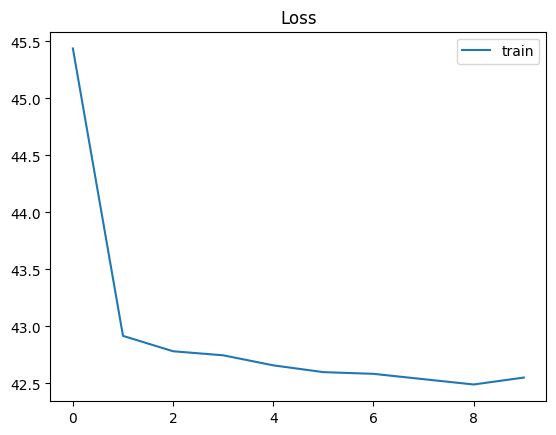

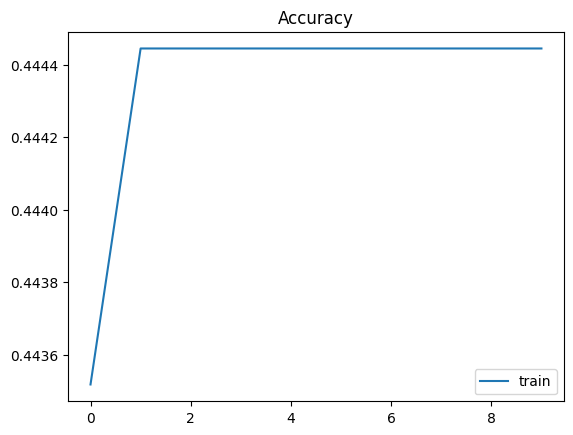

In [122]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
# import matplotlib.pyplot as plt
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(hist.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(hist.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [129]:
filename = 'CnnRZn.h5'
model.save(filename)
# filename = 'CnnZn3RlCrop4004tGPU.h5'
# model.save(filename)